In [1]:
import pandas as pd
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader
from models.cnn import SpamCNN
from utils.data_loader import load_datasets
from transformers import BertTokenizer
from utils.evaluate import check_data_integrity

### Configuration

In [2]:
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 1e-3
MAX_LENGTH = 256

# Check if DIR_ROOT is defined
try:
    DIR_ROOT
except NameError:
    DIR_ROOT = '/content/drive/MyDrive/Colab Notebooks/spam-detection/'

### Mount Google Drive

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

### Load Preprocessed Data

In [4]:
train_df = pd.read_pickle(DIR_ROOT + 'data/processed/train.pkl')
test_df = pd.read_pickle(DIR_ROOT + 'data/processed/test.pkl')

check_data_integrity(train_df)
check_data_integrity(test_df)

Total samples: 4837
Missing values:
text      0
label     0
source    0
dtype: int64
Index range: 0 to 6046
Index continuity check: False
Total samples: 1210
Missing values:
text      0
label     0
source    0
dtype: int64
Index range: 1 to 6040
Index continuity check: False


### Training

In [5]:
from utils.train import train_model

model, train_losses, val_accuracies = train_model(train_df, test_df)

Epoch 1: Loss=0.2685, Acc=95.37%
Epoch 2: Loss=0.0942, Acc=95.54%
Epoch 3: Loss=0.0386, Acc=96.53%
Epoch 4: Loss=0.0194, Acc=96.20%
Epoch 5: Loss=0.0161, Acc=95.54%
Epoch 6: Loss=0.0145, Acc=96.94%
Epoch 7: Loss=0.0114, Acc=96.69%
Epoch 8: Loss=0.0103, Acc=96.69%
Epoch 9: Loss=0.0092, Acc=96.61%
Epoch 10: Loss=0.0094, Acc=96.94%


### Plot Metrics

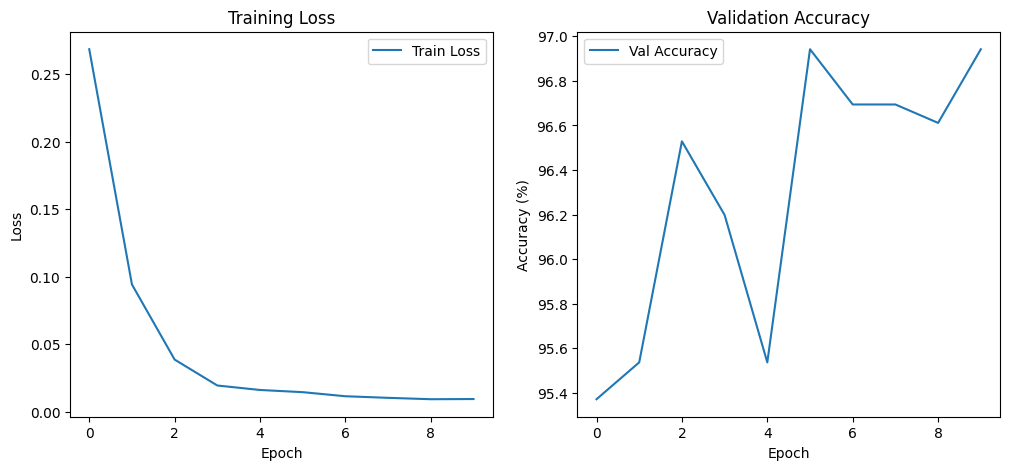

In [6]:
from utils.visualizations import plot_metrics

plot_metrics(train_losses, val_accuracies)

In [8]:
from utils.visualizations import plot_confusion_matrix
from utils.data_loader import get_test_loader

test_loader = get_test_loader(dir_root=DIR_ROOT)
plot_confusion_matrix(model, test_loader)

TypeError: to() received an invalid combination of arguments - got (type), but expected one of:
 * (torch.device device = None, torch.dtype dtype = None, bool non_blocking = False, bool copy = False, *, torch.memory_format memory_format = None)
 * (torch.dtype dtype, bool non_blocking = False, bool copy = False, *, torch.memory_format memory_format = None)
 * (Tensor tensor, bool non_blocking = False, bool copy = False, *, torch.memory_format memory_format = None)


In [1]:
torch.save(model.state_dict(), DIR_ROOT + 'models/cnn_model.pt')

NameError: name 'torch' is not defined

In [ ]:
model = SpamCNN(vocab_size=10000, embed_dim=300)  # Use same params as training

# Load weights
model.load_state_dict(torch.load('cnn_model.pt'))
model.eval()  # Set to evaluation mode